# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 14:34:55--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.08s  

2016-10-24 14:34:55 (56.6 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

In [2]:
!mv abq-food-inspections-fy2010.csv foodinspection.csv

In [3]:
!wc -l foodinspection.csv

17557 foodinspection.csv


In [4]:
!csvcut -n foodinspection.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


1: FACILITY_NAME:Name of the facility where the inspection occurred
2: FACILITY_KEY:The unique identifier (key) of the facility where the inspection occurred
3: SITE_ADDRESS:Street address of the facility where the inspection occurred
4: CITY:City of the facility where the inspection occurred
5: STATE:State of the facility where the inspection occurred
6: ZIP:Zip of the facility where the inspection occurred
7: OWNER_KEY:The unique identifier (key) of the Owner of the facility where the inspection occurred at the time of the inspection
8: OWNER_NAME:Name of the Owner of the facility where the inspection occurred at the time of the inspection
9: NATURE_OF_BUSINESS:The type of business, originally for internal use only, provides information about the business. This is not the information provided on the federal tax form.
10: STREET_NUMBER:Street number of the facility where the inspection occurred
11: STREET_NAME:Street name of the facility where the inspection occurred
12: STREET_TYPE:Street type of the facility where the inspection occurred
13: POST_DIRECTIONAL:Postal direction of the facility where the inspection occurred
14: PHONE:Phone number of the facility where the inspection occurred
15: PROGRAM_CATEGORY:Id that indicates the type of facility permit the inspection was performed
16: PROGRAM_CATEGORY_DESCRIPTION:Descript of the id that indicates the type of facility
17: INSPECTION_DATE:Date the inspection occurred
18: INSPECTION_TYPE:Code for type of inspection
19: INSPECTION_DESC:Description of the inspection
20: SERIAL_NUM:Unique ID for the inspection daily activity. This is a sequential number assigned chronologically as the data is entered into the system. If there are multiple rows with the same OWNER_ID and INSPECTION_DATE and SERIAL_NUM, itmeans that there were multiple rows created for one inspection (multiple results were recorded). If there are multiple rows with the same OWNER_ID and INSPECTION_DATE and a different SERIAL_NUM, it means that there were multiple inspections taken on the same day and the highest SERIAL_NUM is intended to be the most recent inspection.
21: ACTION_CODE:Code of the action taken. If the ACTION_CODE is equal to 00 – NON-GRADED this indicates that the inspector was unable to actually perform an inspection. The RESULT_CODE documents the situation.
22: ACTION_DESC:Description of the action taken
23: RESULT_CODE:Code of the result of the inspection
24: RESULT_DESC:Description of the result of the inspection
25: VIOLATION_CODE:The code for the violation
26: VIOLATION_DESC:Description of the violation that was found
27: INSPECTION_MEMO:Notes from the inspection made by the inspector

In [5]:
!head -5 foodinspection.csv | csvlook

|----------------------+--------------+-------------------------------+-------------+-------+-------+-----------+---------------------+--------------------+---------------+-------------+-------------+------------------+------------+------------------+------------------------------+---------------------+-----------------+-------------------------+------------+-------------+-------------+-------------+----------------+----------------+----------------------------------+------------------|
|  FACILITY_NAME       | FACILITY_KEY | SITE_ADDRESS                  | CITY        | STATE | ZIP   | OWNER_KEY | OWNER_NAME          | NATURE_OF_BUSINESS | STREET_NUMBER | STREET_NAME | STREET_TYPE | POST_DIRECTIONAL | PHONE      | PROGRAM_CATEGORY | PROGRAM_CATEGORY_DESCRIPTION | INSPECTION_DATE     | INSPECTION_TYPE | INSPECTION_DESC         | SERIAL_NUM | ACTION_CODE | ACTION_DESC | RESULT_CODE | RESULT_DESC    | VIOLATION_CODE | VIOLATION_DESC                   | INSPECTION_MEMO  |
|---------------

In [ ]:
!shuf -n 17557 foodinspection.csv | csvstat

There are 12 columns that have NULL values, the column name of which are site_address,nature_of_business,street_number,
street_name,street_type,post_direction,phone,program_catrgory_description,inspection_type,violation_code,violation_desc
and inspection_memo.

Since the data is about food inspections, I found serial_num,inspection_date,inspection_type,action_desc and 
violation_desc interest me the most. Based on these columns, I can ask there are how many inspections actually happened? Which day of the week did the inspections happen the most frequently? During a specific time period, how many inspections were approved or found violation?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [5]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


Create a database named foodinspection for the dbuser.

In [6]:
!createdb -U dbuser foodinspections

In [7]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Connect to 'foodinspections' database of dbuser.

In [8]:
%sql postgresql://dbuser@localhost:5432/foodinspections

'Connected: dbuser@foodinspections'

Create a database table named 'food_inspection'.

In [9]:
%%sql
DROP TABLE IF EXISTS food_inspection;
CREATE TABLE food_inspection (
    facility_name VARCHAR(202),
    facility_key CHAR(20),
    site_address VARCHAR(102),
    city VARCHAR(52),
    state CHAR(6),
    zip CHAR(22),
    owner_key CHAR(26),
    owner_name VARCHAR(202),
    nature_of_business CHAR(25),
    street_number CHAR(16),
    street_name VARCHAR(52),
    street_type CHAR(10),
    post_directional CHAR(6),
    phone CHAR(42),
    program_category CHAR(10),
    program_category_des VARCHAR(64),
    inspection_date TIMESTAMP,
    inspection_type CHAR(4),
    inspection_desc VARCHAR(102),
    serial_num CHAR(20),
    action_code CHAR(6),
    action_desc VARCHAR(102),
    result_code CHAR(6),
    result_desc VARCHAR(102),
    violation_code CHAR(14),
    violation_desc VARCHAR(202),
    inspection_memo VARCHAR(502)
)

Done.
Done.


[]

Copy the data from foodinspection.csv to the new table 'food_inspection' or in other words, load the csv dataset into the new database table. 

In [10]:
%%sql
COPY food_inspection FROM '/home/jovyan/work/foodinspection.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [ ]:
%%sql
SELECT *
FROM food_inspection
LIMIT 50;

In [12]:
%%sql
SELECT COUNT(*) FROM food_inspection;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

In [13]:
%%sql
DROP TABLE IF EXISTS inspection;
CREATE TABLE inspection(
    facility_name VARCHAR(202),
    owner_key CHAR(26),
    inspection_date TIMESTAMP,
    inspection_desc VARCHAR(102),
    serial_num CHAR(20),
    action_desc VARCHAR(102),
    result_desc VARCHAR(102),
    violation_desc VARCHAR(202)
);

Done.
Done.


[]

In [14]:
%%sql
INSERT INTO inspection(facility_name,owner_key,inspection_date,inspection_desc,serial_num,action_desc,result_desc,violation_desc)
SELECT DISTINCT facility_name,owner_key,inspection_date,inspection_desc,serial_num,action_desc,result_desc,violation_desc
FROM food_inspection;

17556 rows affected.


[]

In [21]:
%%sql
SELECT * 
FROM inspection
ORDER BY facility_name ASC
LIMIT 5;

5 rows affected.


facility_name,owner_key,inspection_date,inspection_desc,serial_num,action_desc,result_desc,violation_desc
00BSAY IT WITH CAKE,47341,2010-04-14 00:00:00,ROUTINE FOOD INSPECTION,DA8010205,APPROVED,IN COMPLIANCE,No Violations Found
00BSAY IT WITH CAKE,47341,2009-10-21 00:00:00,EMERGENCY RESPONSE,DA8009125,NON-GRADED,NOT APPLICABLE,Delivered Informational Brochure
00BSAY IT WITH CAKE,47341,2009-10-21 00:00:00,ROUTINE FOOD INSPECTION,DA8009123,APPROVED,IN COMPLIANCE,Additional Comments
00BSAY IT WITH CAKE,47341,2010-04-14 00:00:00,ROUTINE FOOD INSPECTION,DA8010205,APPROVED,IN COMPLIANCE,Additional Comments
00BSAY IT WITH CAKE,47341,2009-10-21 00:00:00,ROUTINE FOOD INSPECTION,DA8009123,APPROVED,IN COMPLIANCE,No Violations Found


How many inspections actually happened?

In [15]:
%%sql
SELECT COUNT(*)
FROM(
    SELECT DISTINCT serial_num
    FROM inspection) AS d;

1 rows affected.


count
9046


Of all the food inspections, how many of them are routine food inspection?

In [16]:
%%sql
SELECT COUNT(*)
FROM(
    SELECT DISTINCT serial_num,inspection_desc
    FROM inspection
    WHERE inspection_desc='ROUTINE FOOD INSPECTION')AS d;

1 rows affected.


count
5074


Of all the food inspections, how many of them are approved by the inspector?

In [17]:
%%sql
SELECT COUNT(*)
FROM(
    SELECT DISTINCT serial_num,action_desc
    FROM inspection
    WHERE action_desc='APPROVED')AS d;

1 rows affected.


count
6019


Of all the food inspection, how many of them found evidence of insects and rodents?

In [18]:
%%sql
SELECT COUNT(*)
FROM(
    SELECT serial_num,violation_desc
    FROM inspection
    GROUP BY serial_num,violation_desc)AS d
WHERE violation_desc='Evidence of insects'
    OR violation_desc='Evidence of rodents';

1 rows affected.


count
65


Of all the 7 ELEVEN and its branches, how many of them were found having improper sanitizing and what are the facility names of these 7 ELEVEN branches?

In [19]:
%%sql
SELECT COUNT(*)
FROM(
    SELECT DISTINCT facility_name,violation_desc
    FROM inspection
    WHERE facility_name LIKE '7 ELEVEN %' and violation_desc = 'Improper sanitizing' 
    ORDER BY facility_name)AS d;

1 rows affected.


count
4


In [20]:
%%sql
SELECT DISTINCT facility_name,violation_desc
FROM inspection
WHERE facility_name LIKE '7 ELEVEN%' AND violation_desc = 'Improper sanitizing'
ORDER BY facility_name;

4 rows affected.


facility_name,violation_desc
7 ELEVEN 705,Improper sanitizing
7 ELEVEN 708,Improper sanitizing
7 ELEVEN 710,Improper sanitizing
7 ELEVEN 712,Improper sanitizing


What is the earliest inspection date?

In [21]:
%%sql
SELECT MIN(inspection_date)
FROM inspection;

1 rows affected.


min
2009-07-01 00:00:00


What is the latest inspection date?

In [22]:
%%sql
SELECT MAX(inspection_date)
FROM inspection;

1 rows affected.


max
2010-06-30 00:00:00


In [ ]:
%%sql
SELECT TO_CHAR(inspection_date, 'YYYY-MM-DD') AS day_of_year, 
    TO_CHAR(inspection_date, 'YYYY') AS year,
    TO_CHAR(inspection_date, 'MM') AS month,
    TO_CHAR(inspection_date, 'DD') AS day,
    TO_CHAR(inspection_date, 'Day') AS day_of_week_str,
    TO_CHAR(inspection_date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS is_weekday,
    TO_CHAR(inspection_date, 'HH24') AS hour_24,
    TO_CHAR(inspection_date, 'Q') AS quarter
FROM inspection;

In [24]:
%%sql
DROP TABLE IF EXISTS days;
CREATE TABLE days (
    id SERIAL,
    inspection_date TIMESTAMP,
    day_of_year CHAR(10),
    year INTEGER,
    month INTEGER,
    day INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_24 INTEGER,
    quarter INTEGER
);

Done.
Done.


[]

In [25]:
%%sql
INSERT INTO days (inspection_date,day_of_year, year, month, day, day_of_week_str, day_of_week,
                  is_weekend, is_weekday, hour_24, quarter)
SELECT inspection_date,
    TO_CHAR(inspection_date, 'YYYY-MM-DD') AS day_of_year, 
    CAST(TO_CHAR(inspection_date, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(inspection_date, 'MM') AS INTEGER) AS month,
    CAST(TO_CHAR(inspection_date, 'DD') AS INTEGER) AS day,
    TO_CHAR(inspection_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(inspection_date, 'HH24') AS INTEGER) AS hour_24,
    CAST(TO_CHAR(inspection_date, 'Q') AS INTEGER) AS quarter
FROM inspection;

17556 rows affected.


[]

In [26]:
%%sql
SELECT *
FROM days
LIMIT 5;

5 rows affected.


id,inspection_date,day_of_year,year,month,day,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_24,quarter
1,2009-12-23 00:00:00,2009-12-23,2009,12,23,Wednesday,4,False,True,0,4
2,2009-10-23 00:00:00,2009-10-23,2009,10,23,Friday,6,False,True,0,4
3,2009-07-23 00:00:00,2009-07-23,2009,7,23,Thursday,5,False,True,0,3
4,2010-01-07 00:00:00,2010-01-07,2010,1,7,Thursday,5,False,True,0,1
5,2009-09-09 00:00:00,2009-09-09,2009,9,9,Wednesday,4,False,True,0,3


How many of the inspections happened on Wednesday?

In [24]:
%%sql
SELECT COUNT(*)
FROM(
    SELECT DISTINCT serial_num,day_of_week_str
    FROM inspection
    INNER JOIN days
    ON inspection.inspection_date=days.inspection_date
    ORDER BY serial_num)AS d
WHERE day_of_week_str='Wednesday';

1 rows affected.


count
1782


What are the types of inspection action description? There are how many of them in each type? 

In [38]:
%matplotlib inline

In [39]:
%%sql
SELECT DISTINCT action_desc
FROM inspection;

8 rows affected.


action_desc
UNSATISFACTORY
NON-GRADED
ANNUAL STICKER NOT ISSUED
FACILITY CLOSED AT TIME OF SERVICE
FOOD PERMIT SUSPENSION
NO PERMIT APPLICATION ISSUED
APPROVED
ANNUAL STICKER ISSUED


In [40]:
%%sql
SELECT action_desc,COUNT(action_desc)
FROM(
    SELECT DISTINCT serial_num,action_desc
    FROM inspection)AS d
GROUP BY action_desc
ORDER BY action_desc;

8 rows affected.


action_desc,count
ANNUAL STICKER ISSUED,186
ANNUAL STICKER NOT ISSUED,10
APPROVED,6019
FACILITY CLOSED AT TIME OF SERVICE,1
FOOD PERMIT SUSPENSION,1
NO PERMIT APPLICATION ISSUED,1
NON-GRADED,2781
UNSATISFACTORY,47


<Container object of 8 artists>

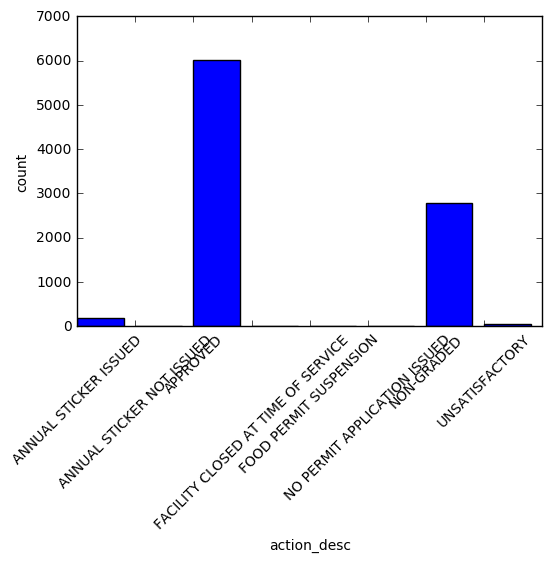

In [41]:
%matplotlib inline
result = _
result.bar()

From the findings above, I would say that there are 8 types of action description and the top 3 action description are APPROVED,NON-GRADED and ANNUAL STICKER ISSUED.

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

I noticed that food_inspection table may contain redundant information and there are three unique identifiers---facility_key,owner_key and serial_num.Therefore, I let these three identifiers be the primary keys and create three new tables containing three different groups of information. The columns which need to be normalized are shown below.

In [49]:
%%sql
DROP TABLE IF EXISTS facility;
CREATE TABLE facility ( 
    facility_key CHAR(20),
    facility_name VARCHAR(202),
    street_number CHAR(16),
    street_name VARCHAR(52),
    street_type CHAR(10),
    phone CHAR(42),
    CONSTRAINT facility_facility_key_pk PRIMARY KEY (facility_key));

DROP TABLE IF EXISTS owner;
CREATE TABLE owner ( 
    owner_key CHAR(26),
    owner_name VARCHAR(202),
    CONSTRAINT owner_owner_key_pk PRIMARY KEY (owner_key));

DROP TABLE IF EXISTS inspection;
CREATE TABLE inspection ( 
    serial_num CHAR(20),
    inspection_date TIMESTAMP,
    inspection_desc VARCHAR(102),
    action_desc VARCHAR(102),
    result_desc VARCHAR(102),
    CONSTRAINT inspection_serial_num_pk PRIMARY KEY (serial_num));

Done.
Done.
Done.
Done.
Done.
Done.


[]

In [50]:
%%sql
INSERT INTO facility(facility_key,facility_name,street_number,street_name,street_type,phone)
SELECT DISTINCT facility_key,facility_name,street_number,street_name,street_type,phone
FROM food_inspection;

INSERT INTO owner(owner_key,owner_name)
SELECT DISTINCT owner_key,owner_name
FROM food_inspection;

INSERT INTO inspection(serial_num,inspection_date,inspection_desc,action_desc,result_desc)
SELECT DISTINCT serial_num,inspection_date,inspection_desc,action_desc,result_desc
FROM food_inspection;

2835 rows affected.
1892 rows affected.
9046 rows affected.


[]

In [ ]:
%%sql
ALTER TABLE food_inspection
ADD FOREIGN KEY (facility_key) REFERENCES facility (facility_key);
ALTER TABLE food_inspection
ADD FOREIGN KEY (owner_key) REFERENCES owner (owner_key);
ALTER TABLE food_inspection
ADD FOREIGN KEY (serial_num) REFERENCES inspection (serial_num);